In [1]:
import pandas as pd 
import pandasql as ps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 10, h = 7, dpi = 200):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

%load_ext autoreload
%autoreload 2

# Stocks

In [3]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [4]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,11,30)

In [11]:
tick = 'AAPL'
stock = yf.download(tick,start=start, end=end, progress=False)
stock.columns = stock.columns.str.lower()

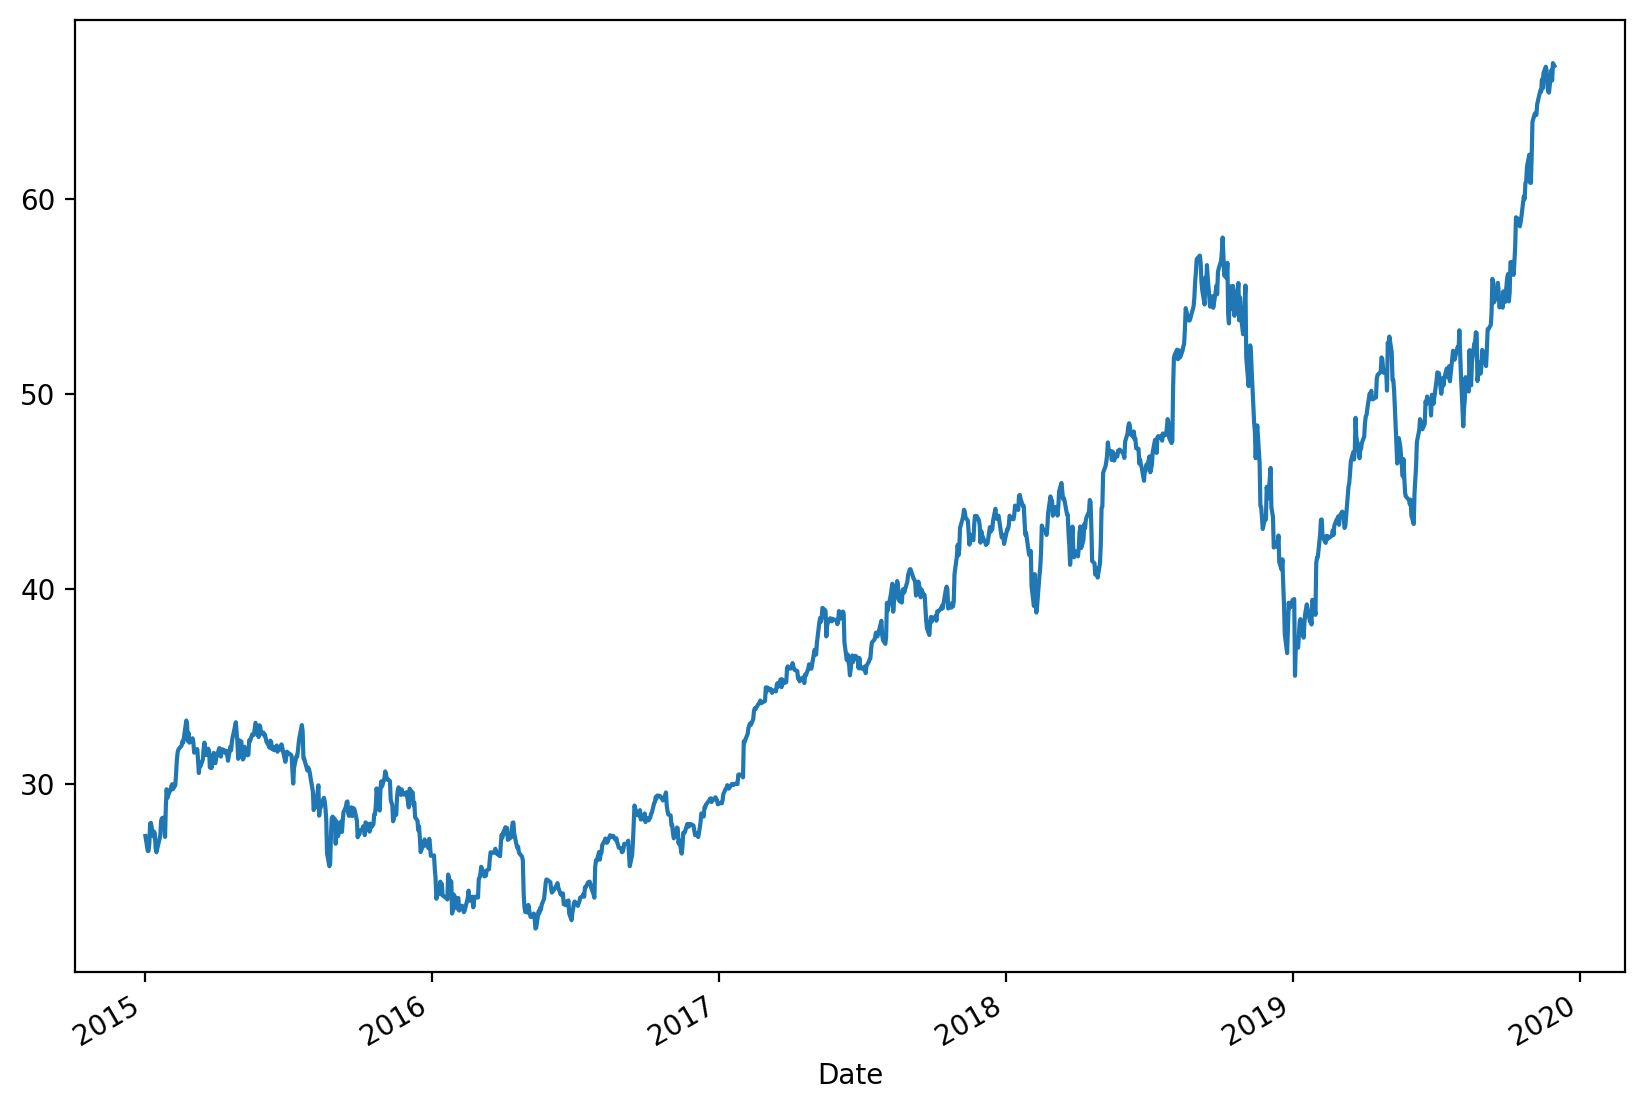

In [14]:
stock.close.plot();

In [21]:
import statsmodels.api as sm

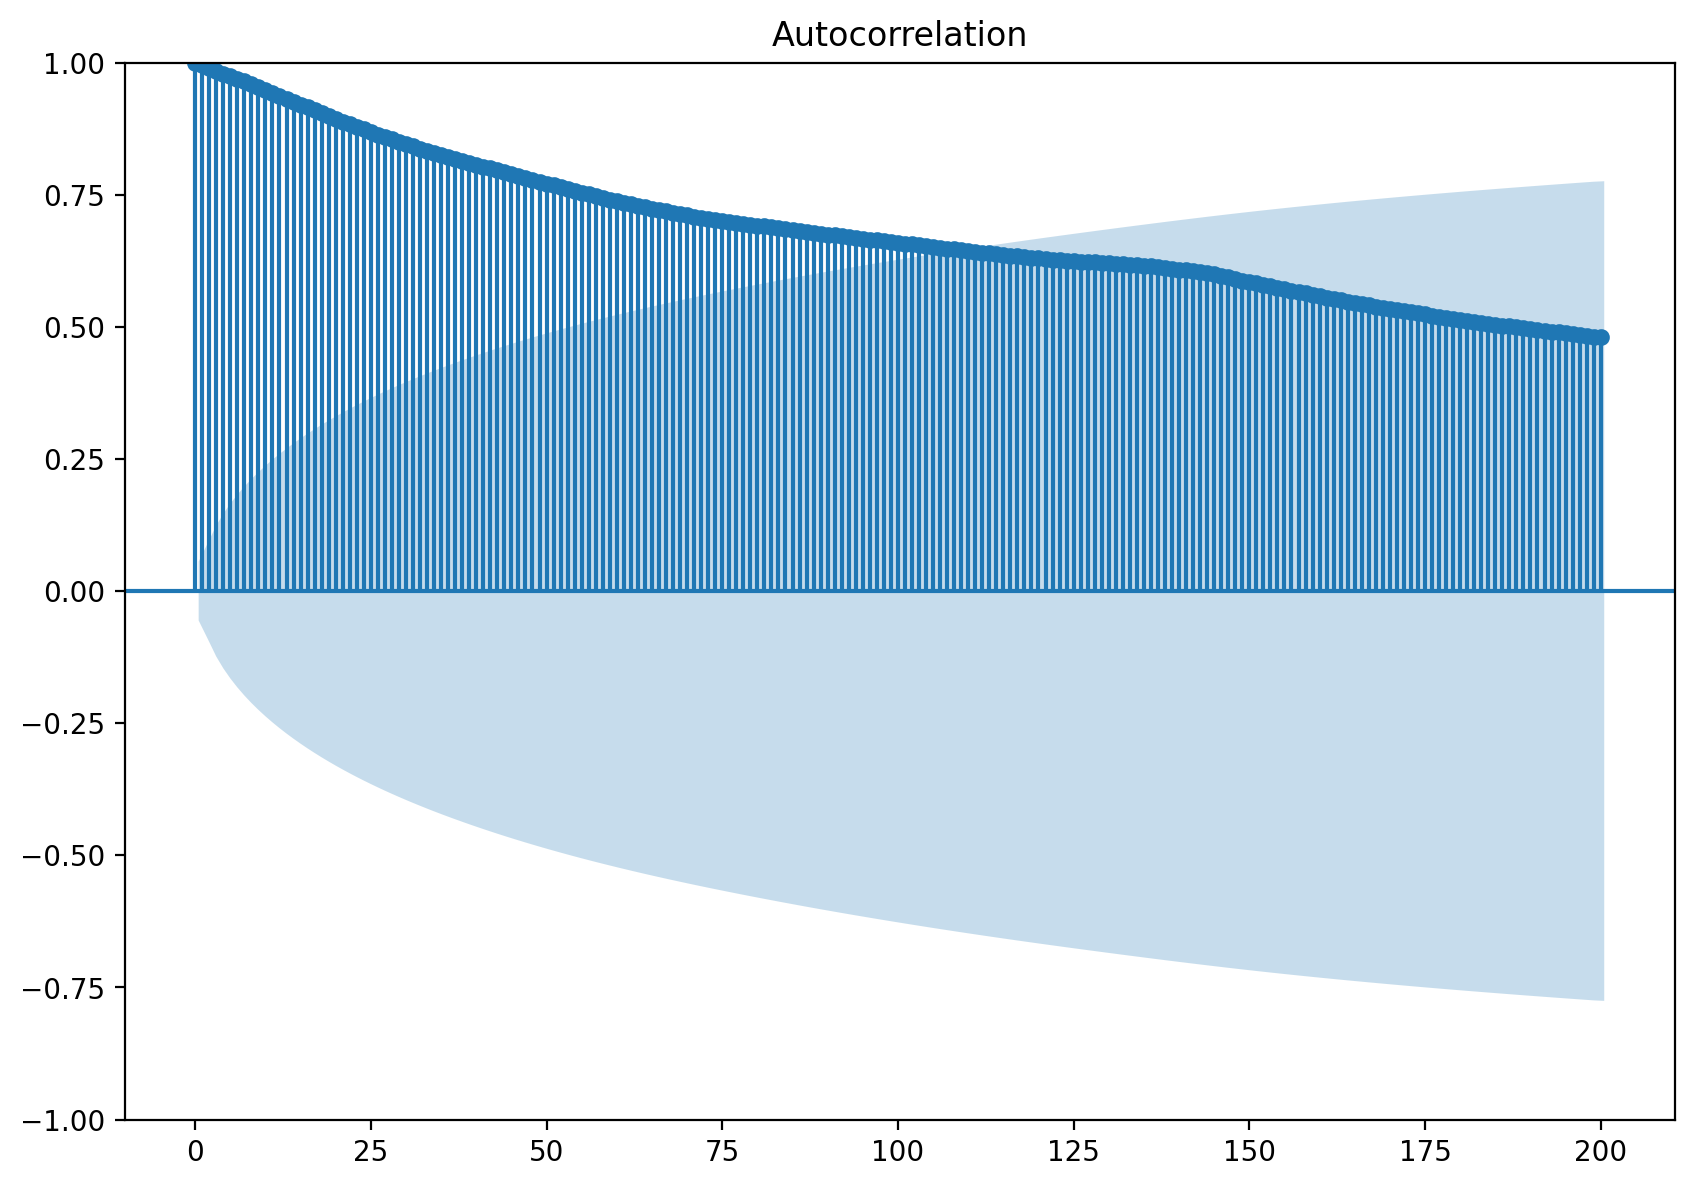

In [27]:
sm.graphics.tsa.plot_acf(stock.close, lags = 200);

In [28]:
def diffdf(df:"pd.DataFrame", var:str, interval:int = 1) -> "pd.DataFrame":
    '''
    Takes a dataframe with a var column which is a time series and returns new dataframe
    with a new variable which results from the difference of time t and time t minus interval
    '''
    # internal func
    series = df[var]

    diff = list()
    for i in range(interval, len(series)):
        value = series[i] - series[i - interval]
        diff.append(value)

    diff = pd.Series(diff)

    # new dataframe with only relevant rows to plot
    newdf = df[interval:]

    # final dataframea
    newdf[f'diff_{interval}'] = diff.values

    newdf

    return newdf

In [ ]:
def embed(df:"pd.DataFrame", var:str, m:int, lag:int):

# Embedding

In [60]:
from gtda.time_series import TakensEmbedding

In [74]:
# embed = TakensEmbedding(time_delay = 3, dimension = 2)

# series = stock['close'].values.reshape(-1,1)
# series

# embed.fit_transform(X = series)

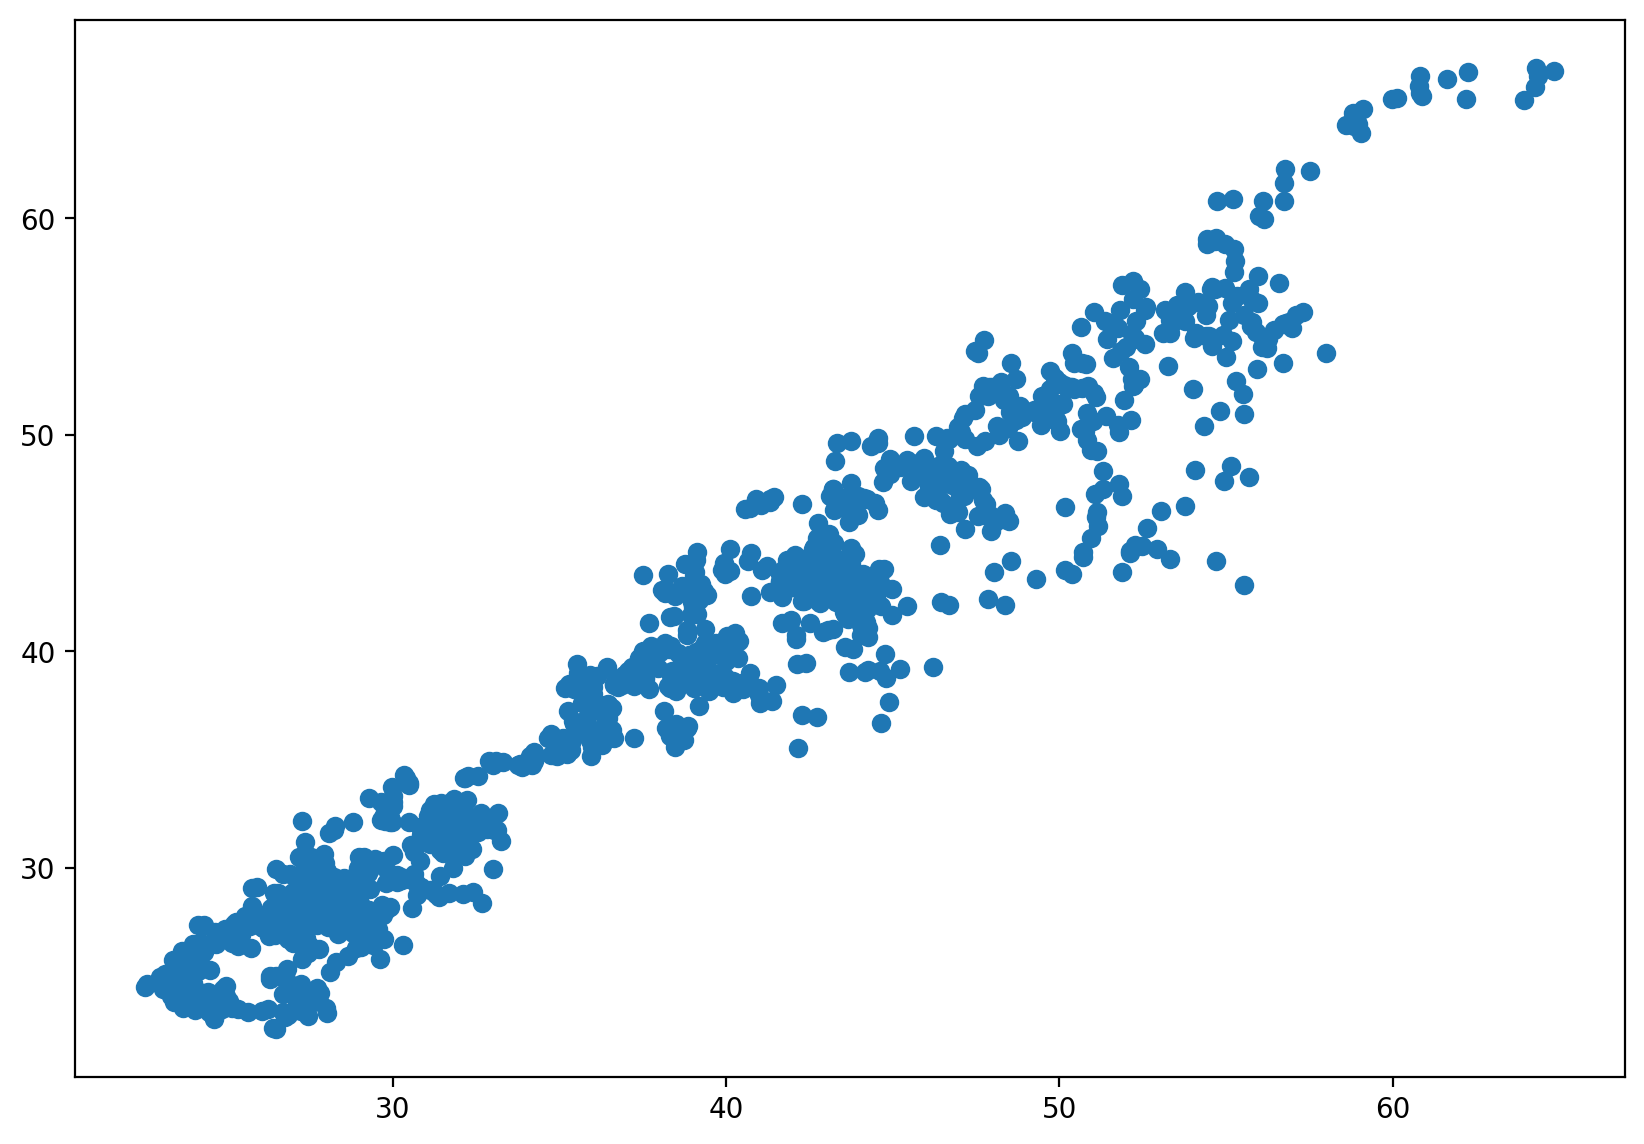

In [140]:
lag = 15
_x = stock.close[:-lag]
# dropa index do segundo
_y = stock.close[lag:].reset_index(drop=True).values
dfnew = pd.DataFrame({'x':_x,'y':_y}); x = dfnew.x; y = dfnew.y
plt.scatter(x,y)
# plt.scatter(x=x,y=y)

In [162]:
def embed(series:"pd.Series", lag:int, plot:bool = True):
    lag = 15
    _x = series[:-lag]
    # dropa index do segundo
    _y = series[lag:].reset_index(drop=True).values
    dfnew = pd.DataFrame({'x':_x,'y':_y}); x = dfnew.x; y = dfnew.y
    if plot:
        plt.scatter(x=x,y=y)

## Seno

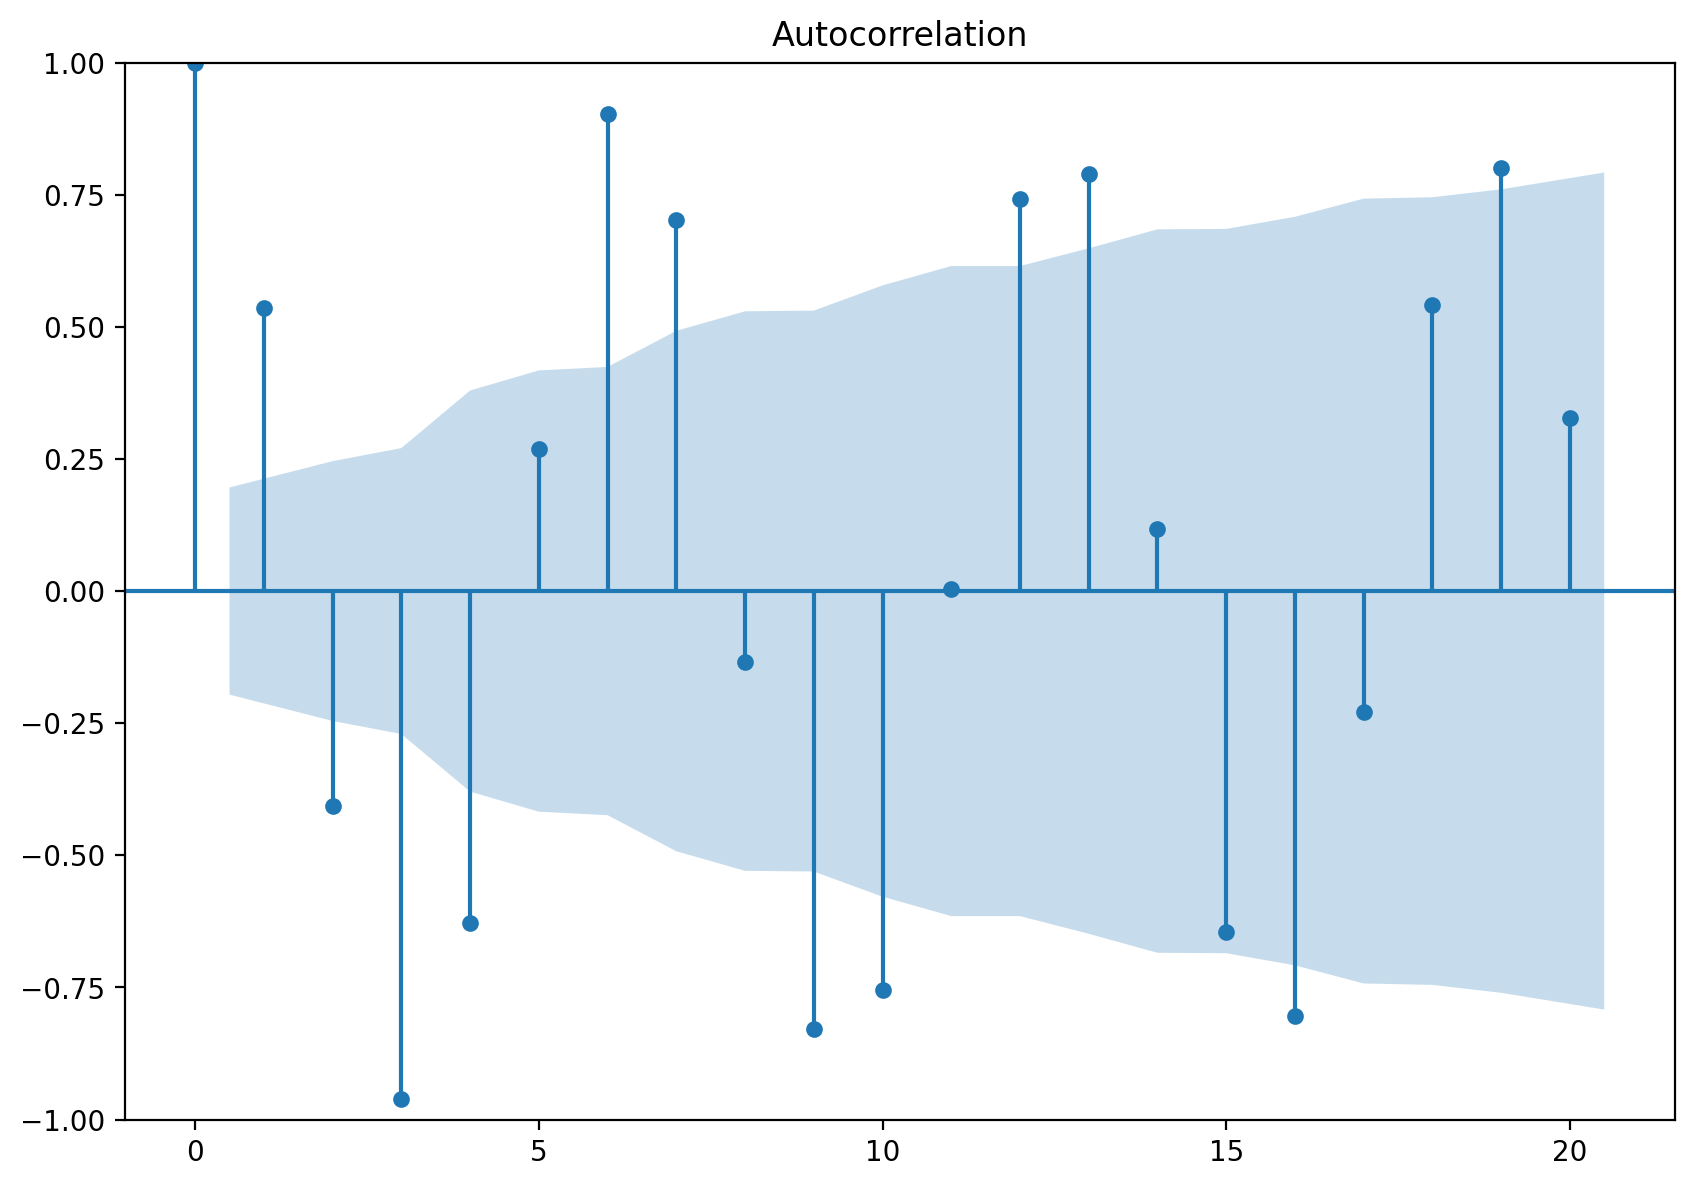

In [163]:
seno = pd.Series(np.sin(range(0,100)))
# plt.plot(seno);
sm.graphics.tsa.plot_acf(seno);

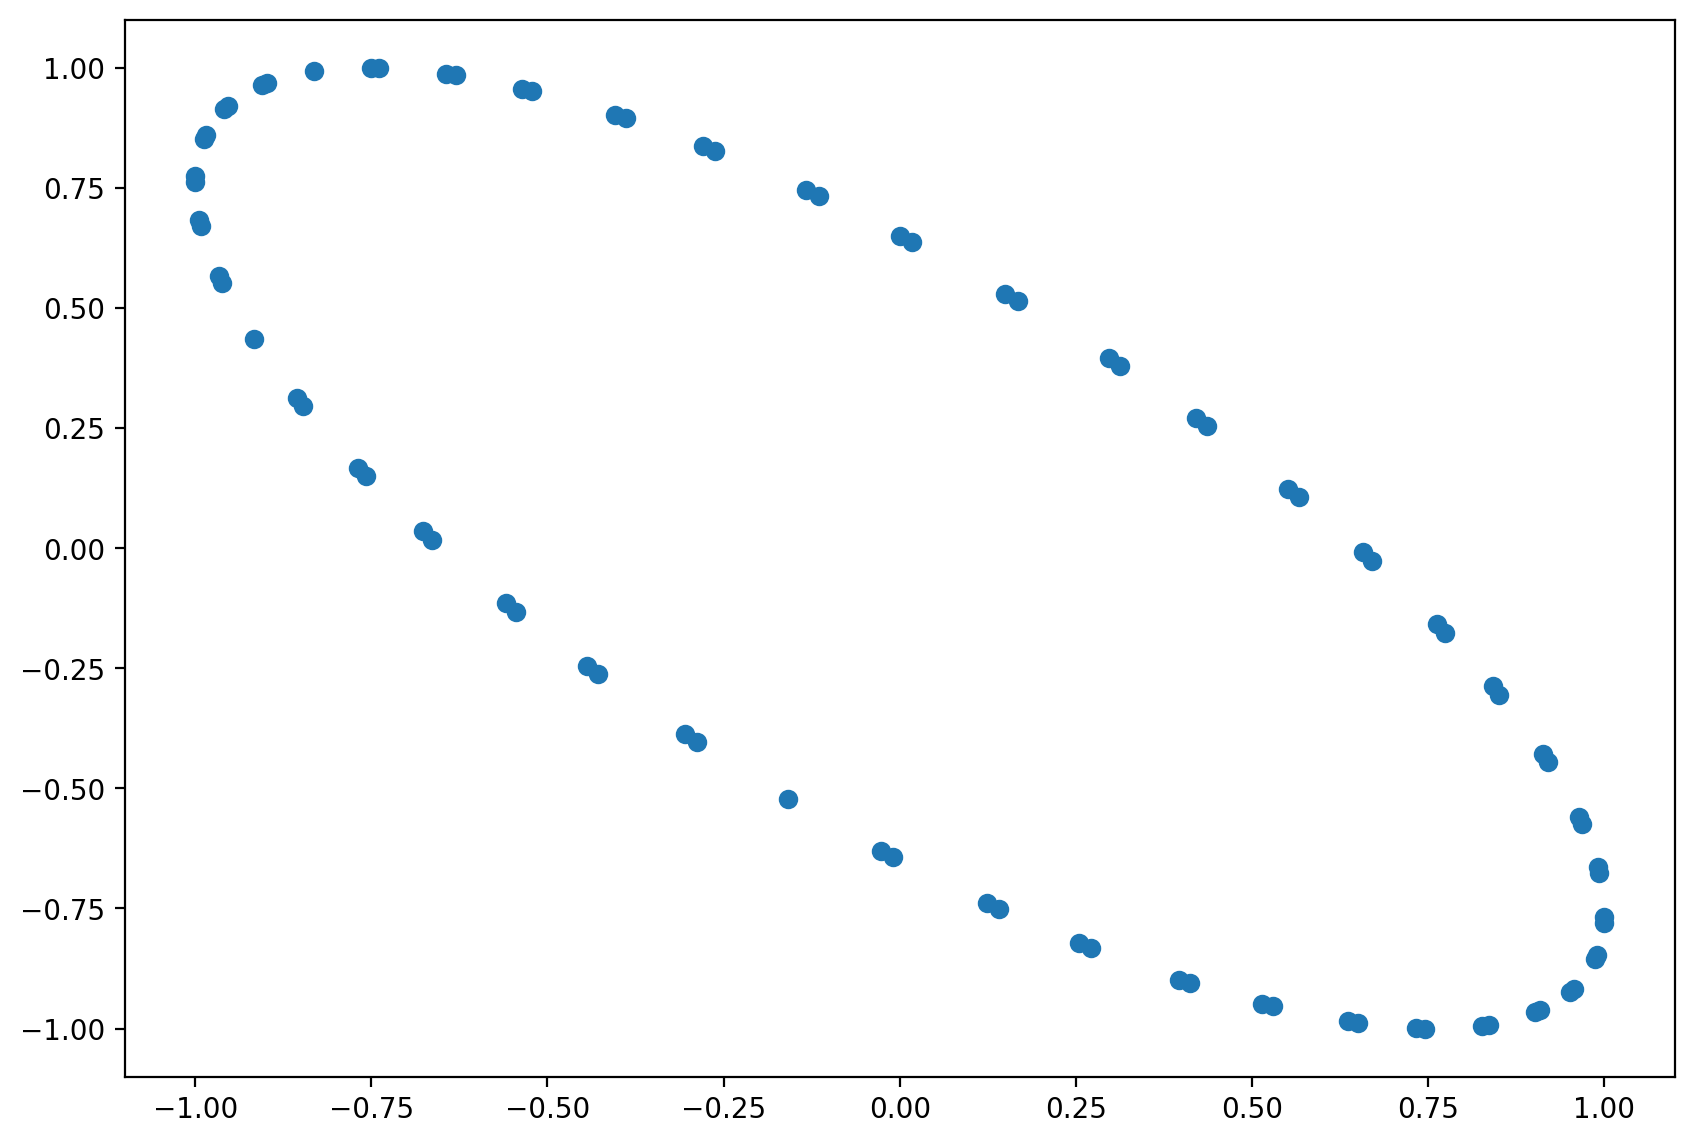

In [166]:
embed(seno,3)

In [170]:
series = seno
lag = 15
_x = series[:-2*lag]
_y = series[lag:-lag].reset_index(drop=True).values
_z = series[2*lag:].reset_index(drop=True).values
dfnew = pd.DataFrame({'x':_x,'y':_y,'z':_z}); x = dfnew.x; y = dfnew.y; z = dfnew.z

### Kaggle - Taken's Embedding

Full credits on https://www.kaggle.com/tigurius/introduction-to-taken-s-embedding

In [176]:
def takensEmbedding (data, delay, dimension):
    "This function returns the Takens embedding of data with delay into dimension, delay*dimension must be < len(data)"
    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceed length of data!')    
    embeddedData = np.array([data[0:len(data)-delay*dimension]])
    for i in range(1, dimension):
        embeddedData = np.append(embeddedData, [data[i*delay:len(data) - delay*(dimension - i)]], axis=0)
    return embeddedData;

In [177]:
aapl = stock.close.values

In [180]:
embedded = takensEmbedding(aapl, delay = 90, dimension = 6)
embedded

array([[27.33250046, 26.5625    , 26.56500053, ..., 38.36999893,
        38.84749985, 38.82500076],
       [31.50250053, 32.23749924, 32.19250107, ..., 41.08499908,
        41.84249878, 43.24750137],
       [28.80249977, 28.35000038, 28.57999992, ..., 46.22999954,
        45.54249954, 46.10749817],
       [24.33499908, 24.10750008, 23.62000084, ..., 53.32500076,
        54.71500015, 55.55500031],
       [24.73500061, 24.91250038, 24.70750046, ..., 45.42750168,
        45.93249893, 46.52999878],
       [29.40749931, 29.38750076, 29.36750031, ..., 51.80500031,
        52.20999908, 52.16749954]])

In [185]:
# load some standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math #math fun
import matplotlib.pyplot as plt #plotting
from mpl_toolkits.mplot3d import Axes3D #3d plots
from sklearn.neighbors import NearestNeighbors 

#load weather data that will be used in the script
cityTable     = pd.read_csv('data/city_attributes.csv')
temperatureDF = pd.read_csv('data/temperature.csv', index_col=0)
temperatureDF.index = pd.to_datetime(temperatureDF.index)

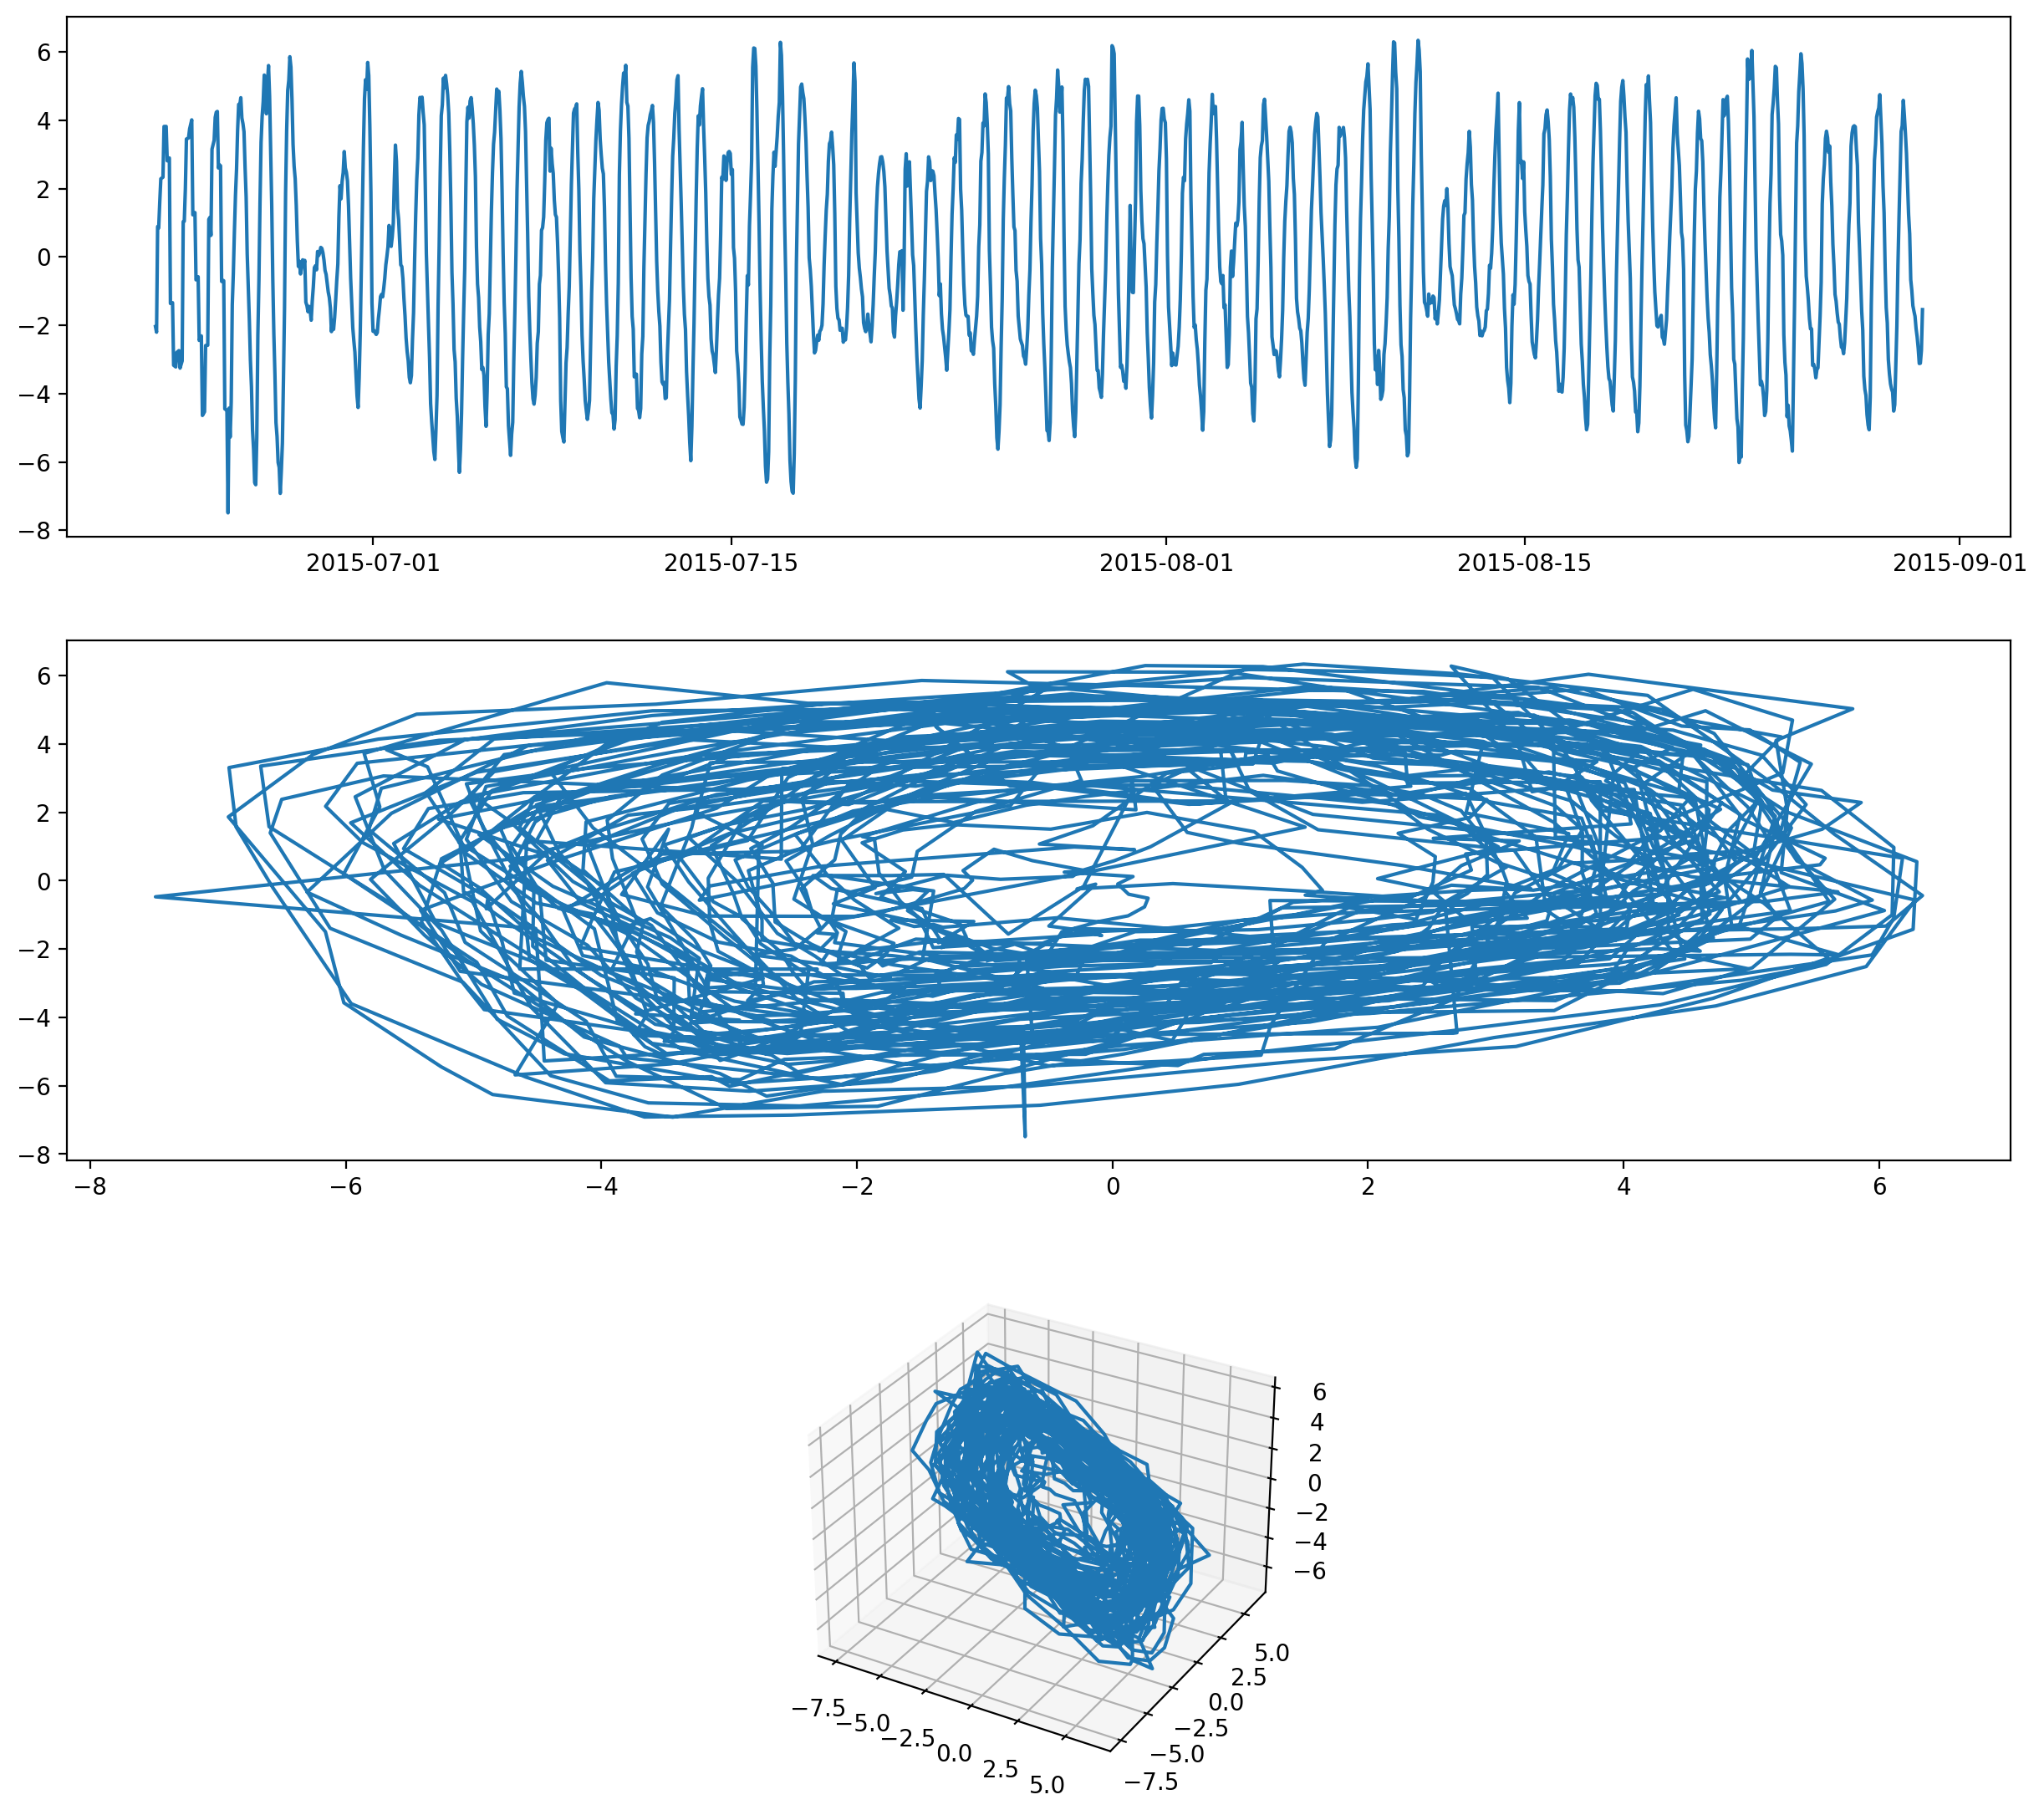

In [186]:
#Apply Takens embedding to daily weather data of Montreal
t = pd.date_range(pd.to_datetime('22/6/2015',dayfirst=True),pd.to_datetime('31/8/2015',dayfirst=True),freq='H')
weatherDataMontreal = temperatureDF.loc[t,'Montreal'];
origSignal = weatherDataMontreal;
#we are interested in the daily dynamics, so we have to highpass-filter the signal 
#to remove the monthly and yearly dynamics
#apply rolling mean over one day and plot the signal (low pass filter) 
windowSize = 24
lowPassFilteredSignal = weatherDataMontreal.rolling(windowSize, center=True).mean()
# subtract the low pass filtered singal from the original to get high pass filtered signal
weatherDataMontreal = weatherDataMontreal - lowPassFilteredSignal
#remove all NaNs
weatherDataMontreal = weatherDataMontreal.dropna()
#embedd into two dimensions
embeddedWeather = takensEmbedding(weatherDataMontreal,5,2);
#plot the time-series and the embedded one 
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(15,14));
ax[0].plot(weatherDataMontreal);
ax[1].plot(embeddedWeather[0,:],embeddedWeather[1,:]);
ax[2].axis('off')
#embed into three dimensions
embeddedWeather3 = takensEmbedding(weatherDataMontreal, 6,3);
#plot the 3D embedding
ax = fig.add_subplot(3, 1, 3, projection='3d')
ax.plot(embeddedWeather3[0,:],embeddedWeather3[1,:],embeddedWeather3[2,:]);

In [187]:
def mutualInformation(data, delay, nBins):
    "This function calculates the mutual information given the delay"
    I = 0;
    xmax = max(data);
    xmin = min(data);
    delayData = data[delay:len(data)];
    shortData = data[0:len(data)-delay];
    sizeBin = abs(xmax - xmin) / nBins;
    #the use of dictionaries makes the process a bit faster
    probInBin = {};
    conditionBin = {};
    conditionDelayBin = {};
    for h in range(0,nBins):
        if h not in probInBin:
            conditionBin.update({h : (shortData >= (xmin + h*sizeBin)) & (shortData < (xmin + (h+1)*sizeBin))})
            probInBin.update({h : len(shortData[conditionBin[h]]) / len(shortData)});
        for k in range(0,nBins):
            if k not in probInBin:
                conditionBin.update({k : (shortData >= (xmin + k*sizeBin)) & (shortData < (xmin + (k+1)*sizeBin))});
                probInBin.update({k : len(shortData[conditionBin[k]]) / len(shortData)});
            if k not in conditionDelayBin:
                conditionDelayBin.update({k : (delayData >= (xmin + k*sizeBin)) & (delayData < (xmin + (k+1)*sizeBin))});
            Phk = len(shortData[conditionBin[h] & conditionDelayBin[k]]) / len(shortData);
            if Phk != 0 and probInBin[h] != 0 and probInBin[k] != 0:
                I -= Phk * math.log( Phk / (probInBin[h] * probInBin[k]));
    return I;

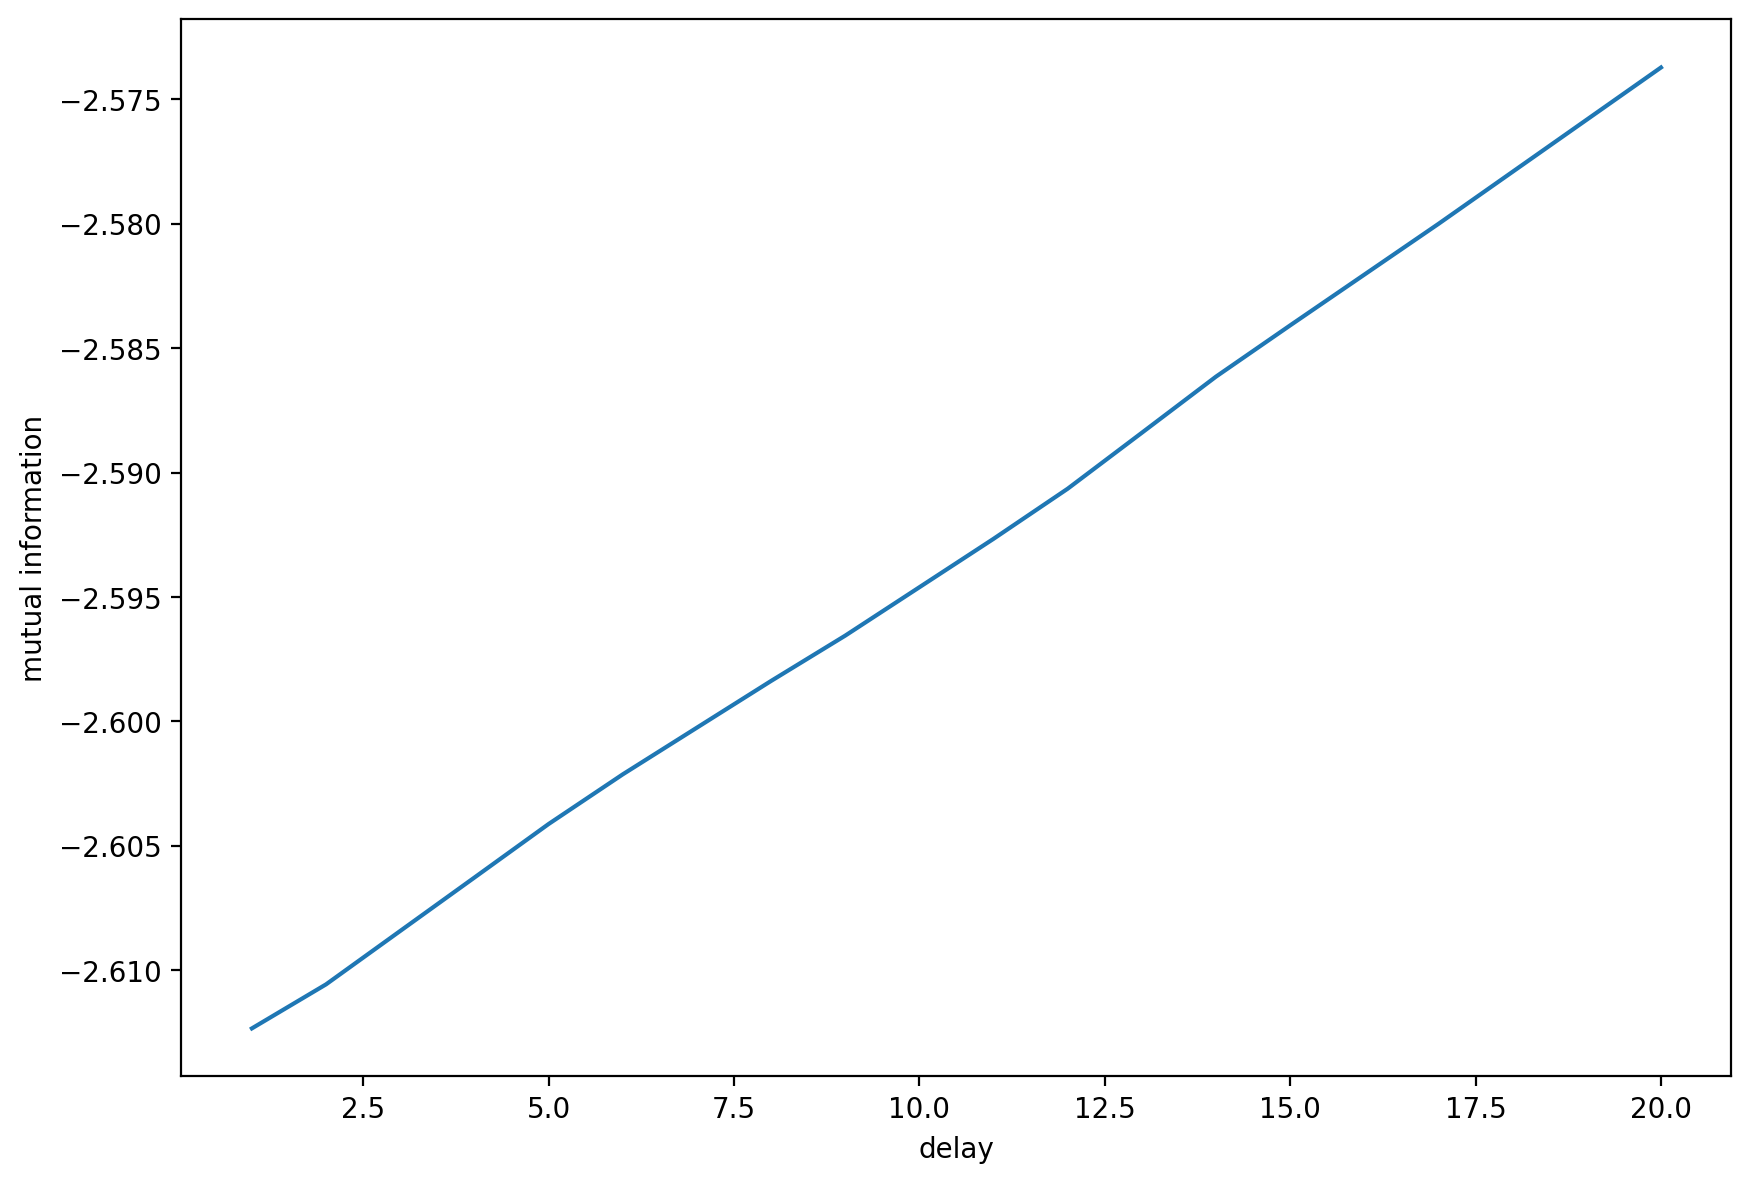

In [188]:
datDelayInformation = []
for i in range(1,21):
    datDelayInformation = np.append(datDelayInformation,[mutualInformation(weatherDataMontreal,i,16)])
plt.plot(range(1,21),datDelayInformation);
plt.xlabel('delay');
plt.ylabel('mutual information');

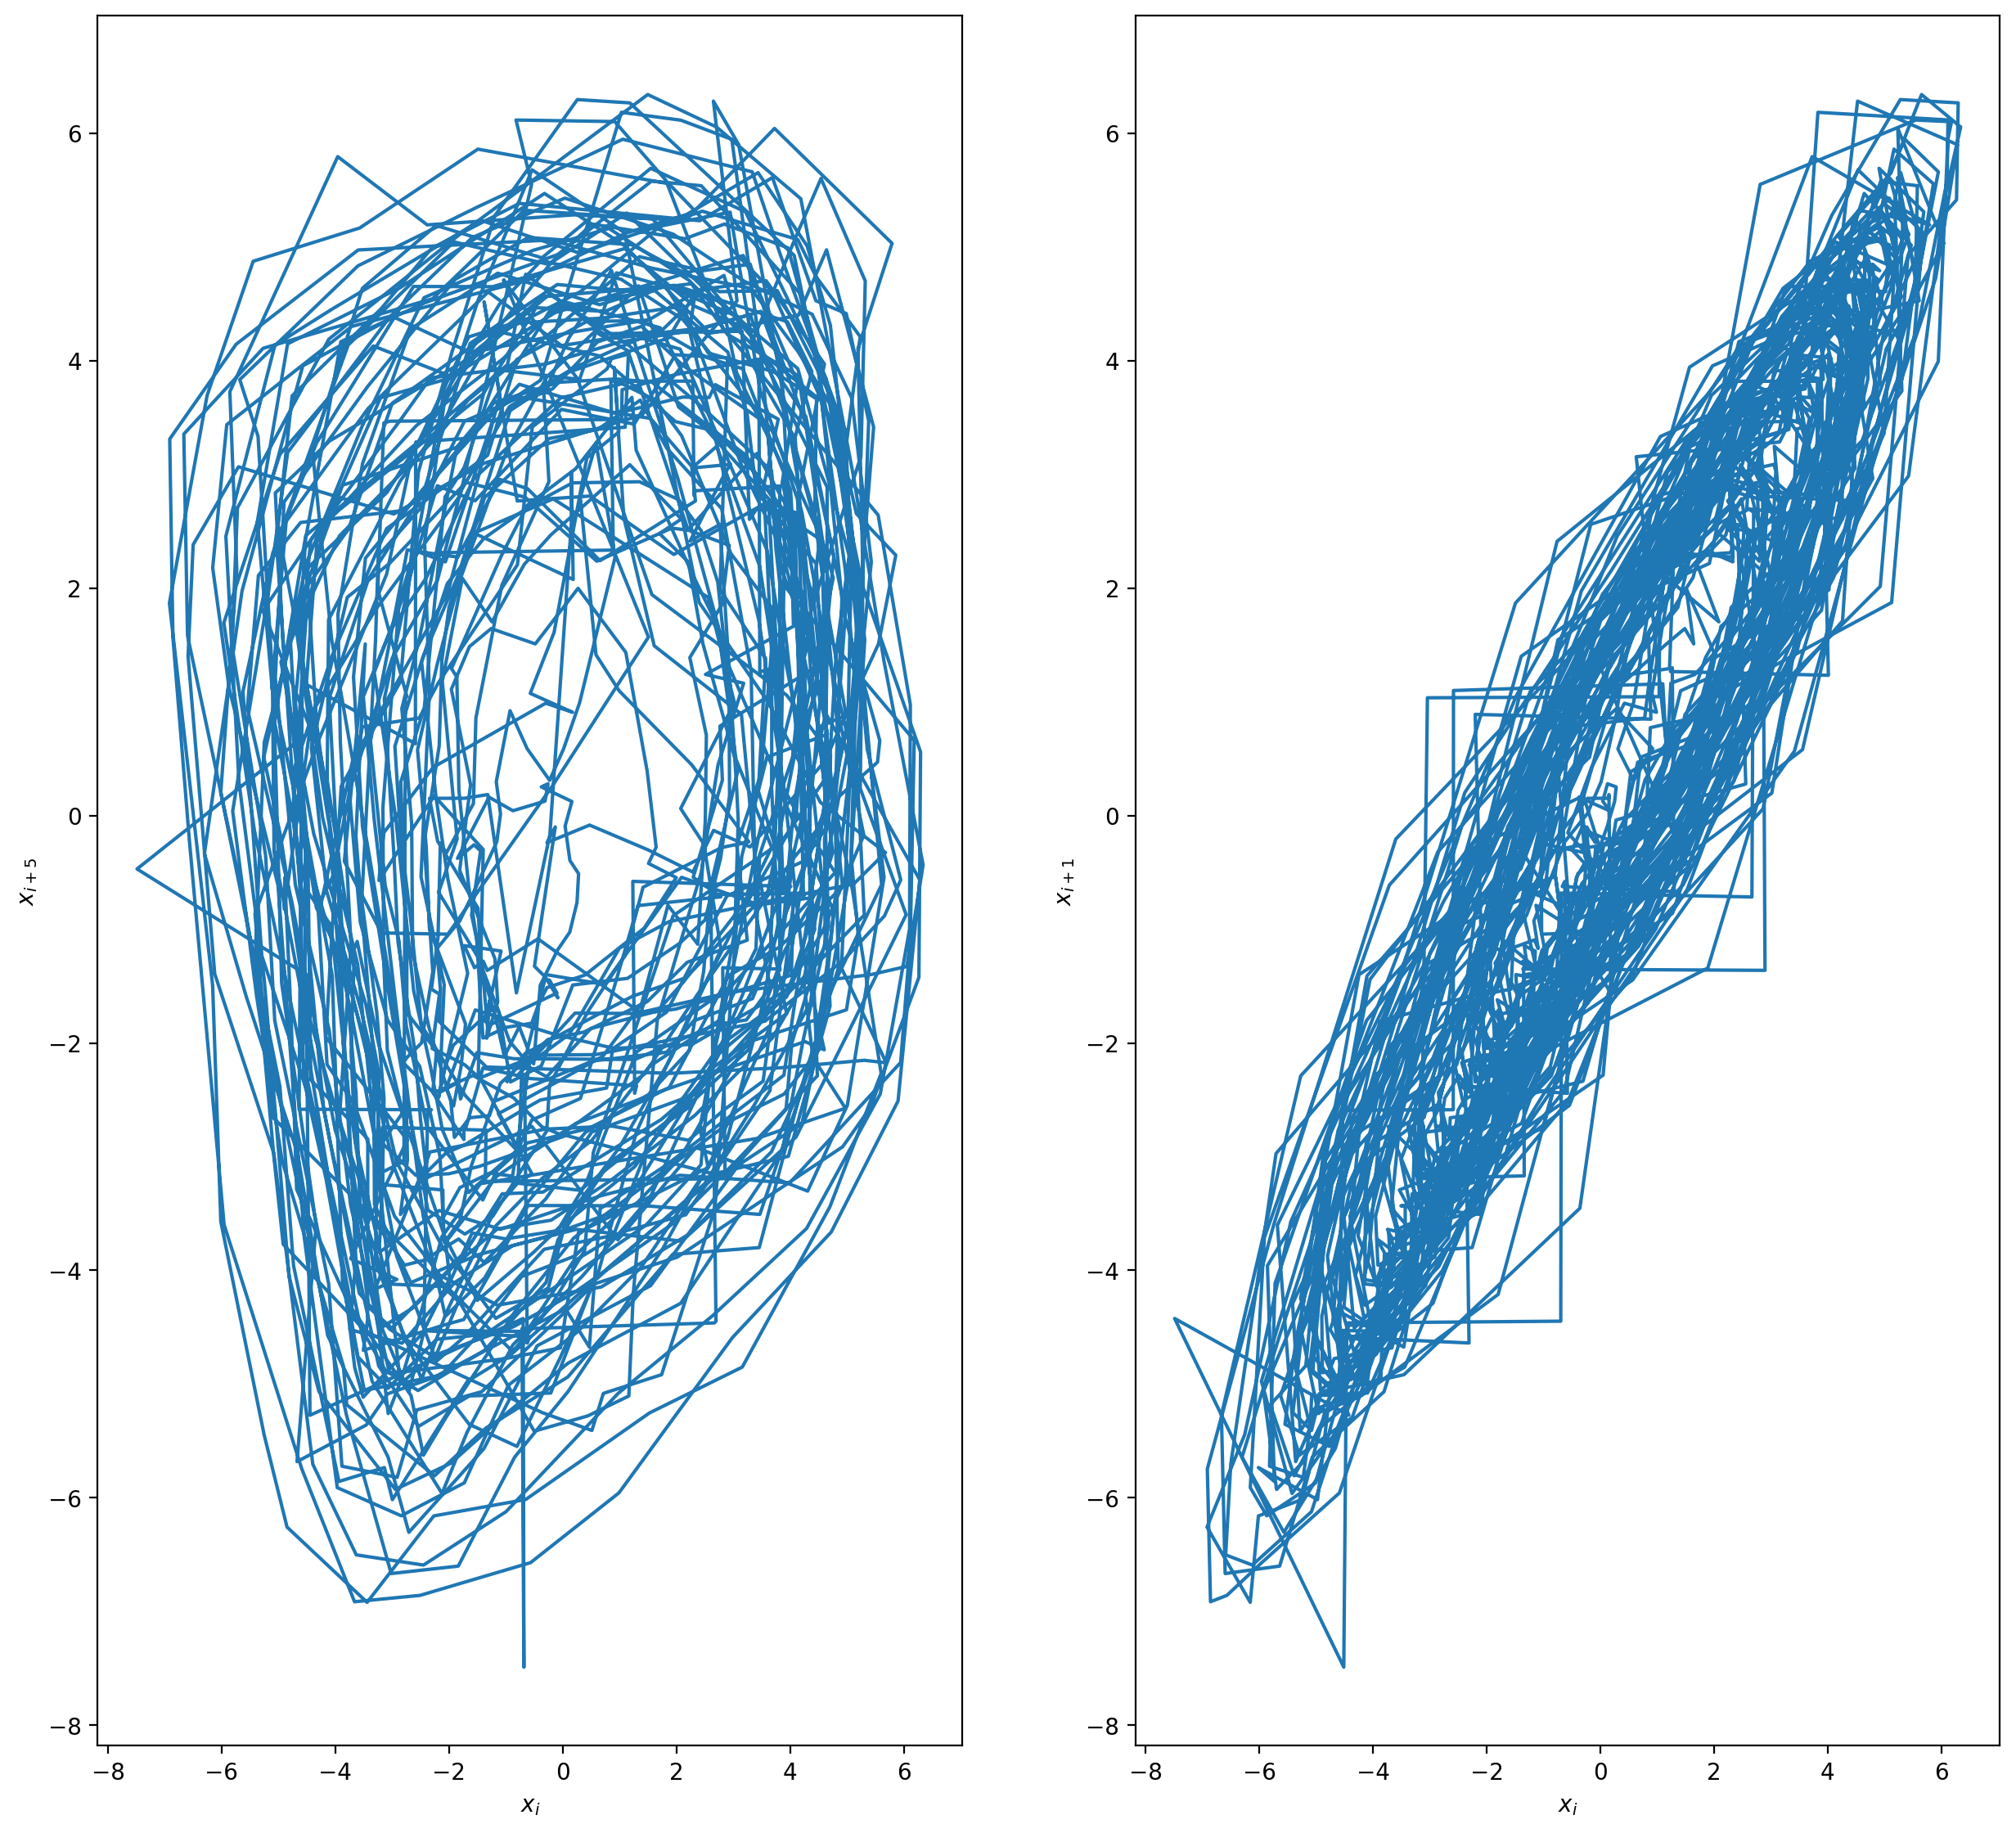

In [189]:
#embedd into two dimensions
embeddedWeather = takensEmbedding(weatherDataMontreal,5,2);
#plot the time-series and the embedded one 
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,14));
ax[0].plot(embeddedWeather[0,:],embeddedWeather[1,:]);
ax[0].set_xlabel('$x_i$');
ax[0].set_ylabel('$x_{i+5}$');
#now with delay=1
embeddedWeather = takensEmbedding(weatherDataMontreal,1,2);
ax[1].plot(embeddedWeather[0,:],embeddedWeather[1,:]);
ax[1].set_xlabel('$x_i$');
ax[1].set_ylabel('$x_{i+1}$');